# 02-Weekly-2015-2022-Statistical

In [1]:
import logging

from matplotlib import pyplot as plt

logging.basicConfig(level=logging.ERROR)  # default logging for other libraries
logging.getLogger('fe507').level = logging.DEBUG
from fe507 import Data, Collection, DataSource, settings, CollectionGroup

settings.data_dir = "../data"

In [2]:
exchange_rates = Data(DataSource.EXCHANGE_RATES)
sp500 = Data(DataSource.SP500)
b100 = Data(DataSource.BIST100)
ball = Data(DataSource.BISTALL)
gold = Data(DataSource.GOLD)
btc = Data(DataSource.BTCETH)

year_range = {
    "from_year": 2015,
    "to_year": 2022
}

DEBUG:fe507.utils:Set up "data_dir" as: ../data
DEBUG:fe507.utils:working on file: /Users/azat/Developer/Learn/FE507-report/data/EXCHANGE.xlsx
DEBUG:fe507.utils:read dataframe from excel as: 
['Date', 'TL/USD', 'TL/Euro']
DEBUG:fe507.utils:handling source specific fields for DataSource.EXCHANGE_RATES
DEBUG:fe507.utils:Set up "data_dir" as: ../data
DEBUG:fe507.utils:working on file: /Users/azat/Developer/Learn/FE507-report/data/SP500.xlsx
DEBUG:fe507.utils:read dataframe from excel as: 
['Date', 'Index', 'Market cap (m$)', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',

In [3]:
## Create Collection
csp = Collection(sp500.data, name="S&P500").get_range(**year_range).get(on='Index')
cb1 = Collection(b100.data, name="BIST100").get_range(**year_range).get(on='Index')
cba = Collection(ball.data, name="BIST ALL").get_range(**year_range).get(on='Index')
cg = Collection(gold.data, name='Gold').get_range(**year_range).get(on='Price ($/t oz)')
cbtc = Collection(btc.data, name="Bitcoin").get_range(**year_range).get(on='Bitcoin')

## SP500

In [4]:
csp.raw

,Index
date,
2015-01-01,2058.90
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
...,...
2022-12-12,3990.56
2022-12-13,4019.65
2022-12-14,3995.32


In [5]:
csp.mean

Index    2980.835895
dtype: float64

In [6]:
csp.variance

Index    660569.74855
dtype: float64

In [7]:
g = CollectionGroup([csp, cb1, cba, cg, cbtc])

In [8]:
g.mean

S&P500       2980.835895
BIST100      1264.851276
BIST ALL     1348.761589
Gold         1465.749102
Bitcoin     12676.917011
dtype: float64

In [9]:
g.variance

S&P500      6.605697e+05
BIST100     5.413134e+05
BIST ALL    7.094168e+05
Gold        7.512064e+04
Bitcoin     2.620194e+08
dtype: float64

In [10]:
g.standard_deviation

S&P500        812.754421
BIST100       735.740021
BIST ALL      842.268817
Gold          274.081452
Bitcoin     16187.014105
dtype: float64

In [11]:
g.max

S&P500       4796.56000
BIST100      5391.91000
BIST ALL     6027.50000
Gold         2052.79500
Bitcoin     67553.94893
dtype: float64

In [12]:
g.min

S&P500      1829.080000
BIST100      685.680000
BIST ALL     699.860000
Gold        1051.970000
Bitcoin      178.016008
dtype: float64

In [13]:
g.inter_quartile_range

S&P500     NaN
BIST100    NaN
BIST ALL   NaN
Gold       NaN
Bitcoin    NaN
dtype: float64

In [14]:
csp.inter_quartile_range

Index    1404.975
dtype: float64

In [15]:
cb1.inter_quartile_range

Index    501.355
dtype: float64

In [16]:
cba.inter_quartile_range

Index    684.845
dtype: float64

In [17]:
cg.inter_quartile_range

Price ($/t oz)    519.08
dtype: float64

In [18]:
cbtc.inter_quartile_range

Bitcoin    13331.746091
dtype: float64

In [19]:
g.skewness

S&P500      0.590823
BIST100     2.865820
BIST ALL    2.769847
Gold        0.420385
Bitcoin     1.616225
dtype: float64

In [20]:
g.kurtosis

S&P500     -0.861520
BIST100     9.278058
BIST ALL    8.859743
Gold       -1.376691
Bitcoin     1.519731
dtype: float64

In [21]:
g.autocorrelation

S&P500      0.999004
BIST100     0.999462
BIST ALL    0.999584
Gold        0.998797
Bitcoin     0.998691
dtype: float64

In [22]:
g.covariance

,S&P500,BIST100,BIST ALL,Gold,Bitcoin
S&P500,6.605697e+05,3.905255e+05,4.650232e+05,1.974475e+05,1.205746e+07
BIST100,3.905255e+05,5.413134e+05,6.236793e+05,1.182902e+05,5.673533e+06
BIST ALL,4.650232e+05,6.236793e+05,7.094168e+05,1.428434e+05,6.967881e+06
Gold,1.974475e+05,1.182902e+05,1.428434e+05,7.512064e+04,3.430805e+06
Bitcoin,1.205746e+07,5.673533e+06,6.967881e+06,3.430805e+06,2.620194e+08


In [23]:
g.correlation

,S&P500,BIST100,BIST ALL,Gold,Bitcoin
S&P500,1.000000,0.655270,0.682664,0.882725,0.904527
BIST100,0.655270,1.000000,0.998345,0.580547,0.527380
BIST ALL,0.682664,0.998345,1.000000,0.612273,0.565746
Gold,0.882725,0.580547,0.612273,1.000000,0.762223
Bitcoin,0.904527,0.527380,0.565746,0.762223,1.000000


In [24]:
corr = g.correlation

In [25]:
corr.style.background_gradient(cmap='coolwarm')

,S&P500,BIST100,BIST ALL,Gold,Bitcoin
S&P500,1.000000,0.655270,0.682664,0.882725,0.904527
BIST100,0.655270,1.000000,0.998345,0.580547,0.527380
BIST ALL,0.682664,0.998345,1.000000,0.612273,0.565746
Gold,0.882725,0.580547,0.612273,1.000000,0.762223
Bitcoin,0.904527,0.527380,0.565746,0.762223,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

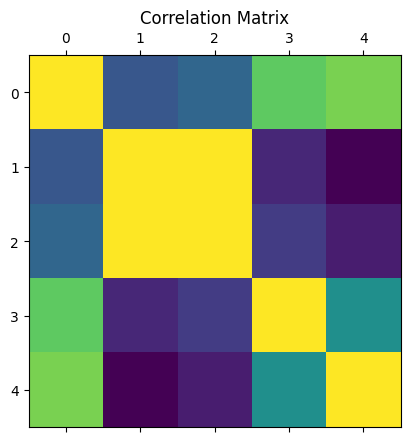

In [27]:
plt.matshow(corr)
plt.title("Correlation Matrix")

In [30]:
csp.geometric_mean

Index    2876.389799
dtype: float64

In [31]:
cb1.geometric_mean

Index    1141.14455
dtype: float64

In [32]:
cba.geometric_mean

Index    1196.126707
dtype: float64

In [33]:
cg.geometric_mean

Price ($/t oz)    1441.021045
dtype: float64

In [34]:
cbtc.geometric_mean

Bitcoin    4399.118256
dtype: float64